## <font color = "#CC3D3D">Case #1: Corner detection</font>

<hr>

### Features of corner
<hr>

- 영상에서 특징(feature)이란 영상으로부터 추출할 수 있는 유용한 정보를 의미하며 평균 밝기, 히스토그램, 에지,<br>
직선 성분, 코너 등이 특징이 될 수 있다. 영상의 특징 중에서 에지, 직선 성분, 코너처럼 영상 전체가 아닌 일부 영역에서<br>
추출할 수 있는 특징을 지역 특징(local feature)이라고 한다.

<hr>

- 코너(corner)의 특징
    - 보통 평탄한 영역(flat) & 에지(edge) 영역은 고유한 위치를 찾기 어렵다. 그러나 코너는 에지의 방향이<br>
    급격하게 변하는 부분으로서 삼각형의 꼭지점이나 연필 심처럼 뾰족하게 튀어나와 있는 부분이 코너가 될 수 있다.
    - 코너는 에지나 직선 성분 등의 다른 지역 특징에 비해 변별력이 높고 대체로 영상 전 영역에 골고루 분포하기<br>
    때문에 영상을 분석하는 데 유용한 지역 특징으로 사용된다.
        - 참고로 코너처럼 한 점의 형태로 표현할 수 있는 특징을 특징점(feature point)이라고 하며,<br>
        특징점은 키포인트(keypoint) 또는 관심점(interest point)이라고 부르기도 한다.
        - 영상의 이동, 회전 변환에 강인하다는 특징 또한 있다.
    - 아래 영상은 코너 특징점의 변별력을 가늠하기 위한 예시이다.
    - <img src="images/markdown/corner.png" width="600">
    - 오른쪽에 나타난 A, B, C 부분 영상은 왼쪽 원본 영상에서 추출한 부분 영상이다.
    - A 부분 영상은 내부 픽셀 값 변화가 크지 않은 평탄한 영역이며, 원본 영상에서 하늘 영역 전체는 모두 A와<br>
    비슷한 픽셀 값 분포를 가진다.
    - B 부분 영상은 하늘과 바다가 만나는 수평선 부근에서 추출되었다는 것을 쉽게 알아차릴 수 있지만, 정확한<br>
    x 좌표는 가늠하기 어렵다.
    - 반면에 C 부분 영상은 특정 건물이 뾰족하게 튀어나와 있는 부분 영상이며, 원본 영상 오른쪽 산등성이에서<br>
    유일한 위치를 찾을 수 있다.
    - C 부분 영상에서 뾰족하게 튀어나와 있는 건물이 영상에서 코너 역할을 하며, 코너는 에지나 평탄한 영역에 비해<br>
    변별력이 높아서 그 위치를 파악하기 수월하다.

<hr>

### Step #1: Method
<hr>

- 해리스(Harris) 코너 검출
    - 1988년 해리스(C. Harris)가 개발한 코너 검출 방법은 코너 점 구분을 위한 기본적인 아이디어를 수학적으로<br>
    잘 정의하였다는 점에서 큰 의미가 있다.
    - 해리스는 영상의 특정 위치(x, y)에서 dx와 dy만큼 떨어진 픽셀과의 밝기 차이를 다음 수식으로 표현하였다.

$$E(\Delta x,\Delta y)=\sum_{x,y} w(x,y)\left [I(x+\Delta x,y+\Delta y)-I(x,y)\right ]^2$$

$${\scriptstyle \text{- 위 수식에서}}\ w(x,y){\scriptstyle \text{는 균일한 값을 갖는 사각형 윈도우 또는 가우시안 형태의 가중치를 갖는 윈도우이다.}}$$

$${\scriptstyle \text{- 만약}}\ E(\Delta x,\Delta y)\ {\scriptstyle \text{함수가 모든 방향으로 값이 크게 나타난다면 점}}(x,y){\scriptstyle \text{는 코너라고 간주할 수 있다.}}$$
<hr>

- FAST 코너 검출
    - FAST: Features from Accelaerated Segment Test
    - 위에서 살펴본 해리스 코너 검출 방법은 영상의 쿠너 특성을 수학적으로 잘 정의하고, 복잡한 수식을 잘 전개하여<br>
    수치적으로 쿠너를 검출하였다는 데 의미가 있다.
    - 이후로도 비슷한 컨셉을 발전시켜 추적에 적합한 특징(Good Features to Track)이라는 이름의 코너 검출<br>
    방법도 제안되었고, OpenCV에도 그 기능이 구현되어 있다. 그러나 이러한 코너 검출 방법들은 복잡한 연산을<br>
    필요로 하기 때문에 연산 속도가 느리다는 단점이 있다. 이러한 코너 검출 방법과 달리 2006년에 발표된 FAST<br>
    코너 검출 방법은 단순한 픽셀 값 비교 방법을 통해 코너를 검출한다. FAST는 그 이름에 걸맞게 매우 빠르게<br>
    동작하는 코너 검출 방법이다.
    - FAST 방법은 영상의 모든 픽셀에서 픽셀을 둘러싸고 있는 `16개의 주변 픽셀`과 밝기를 비교하여 코너 여부를 판별한다.
    - 아래 영상에서는 점 P가 코너인지를 판별하기 위해 P점 주변 1번부터 16번 픽셀과의 밝기를 비교한다. 그리고<br>
    만약 주변 16개의 픽셀 중에서 점 P보다 충분히 밝기나 또는 충분히 어두운 픽셀이 `아홉 개 이상 연속으로 존재`하면<br>
    점 P를 코너로 정의한다.
    - <img src="images/markdown/FASTcorner.png" width="600">
    - FAST 코너 검출 방법을 좀 더 수학적으로 표현하기 위해 `점 P에서의 밝기를 I(p)`라고 표현하겠다.
    - 만약 주변 16개의 픽셀 중에서 그 값이 `I(p) + t` 보다 큰 픽셀이 아롭 개 이상 연속으로 나타나면<br>
    점 P는 `어두운 영역이 뾰족하게 돌출되어 있는 코너`이다. 반면에 주변 16개의 픽셀 중에서 그 값이<br>
    `I(p) - t` 보다 작은 픽셀이 아롭 개 이상 연속으로 나타나면 점 P는 `밝은 영역이 돌출되어 있는`<br>
    `코너`라고 간주한다. 여기서 `t는` 충분히 밝거나 어두운 정도를 조절하기 위한 `임계값(threshold)`이다.
    - FAST 방법은 특정 코너 점 주변 픽셀들도 함께 코너로 검출하는 경우가 많기 때문에 주변 코너 픽셀 중에서<br>
    가장 코너에 적합한 픽셀을 선택하는 `비최대 억제 작업`을 추가적으로 수행하는 것이 좋다. FAST 방법에서는<br>
    코너 점과 주변 16개의 점과의 `픽셀 값 차이 합`을 코너 점수로 정의하고, 인접한 코너 중에서 코너 점수가<br>
    가장 큰 코너만 최종 코너로 선정된다.

<hr>

- 다양한 코너 검출 방법(요약)
    - <img src="images/markdown/corner_detect_method.png" width="600">

<hr>

- 코너 검출 반복성 비교
    - FAST 방법의 반복 검출률이 대체로 높음
    - 다만 FAST 방법은 노이즈에 민감함
    - <img src="images/markdown/comparison_corner_detection.png" width="600">

<hr>

### Step #2: OpenCV function
<hr>

> `해리스 코너 응답 함수 계산`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}cornerHarris}(src, blockSize, ksize, k, dst, borderType)\rightarrow dst}$$
- src: source. 입력 영상
- blockSize: 코너 응답 함수 계산에서 고려할 이웃 픽셀 크기
- ksize: kernel size. (미분을 위한)소벨 연산자를 위한 커널 크기
- k: 해리스 코너 검출 상수
- dst: destination. 해리스 코너 응답 계수
- borderType: 가장자리 픽셀 확장 방식
- `참고사항:`
    - src: 단일채널 8 bit 또는 실수형을 전달한다.
    - blockSize: 보통 2~5를 지정한다.
    - ksize: 보통 3을 지정한다.
    - k: 보통 0.04~0.06 사이의 값을 사용한다.
    - dst: src와 같은 크기의 행렬이다.
        - type=`numpy.ndarray`
        - dtype=`numpy.float32`
    - borderType: `기본값은 cv2.BORDER_DEFAULT`

<hr>

> `추적하기 좋은 특징 코너 검출`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}goodFeaturesToTrack}(image, maxCorners, qualityLevel, minDistance, corners, mask, blockSize, useHarrisDetector, k)\rightarrow corners}$$
- image: 입력 영상
- maxCorners: 최대 코너 개수
- qualityLevel: 코너점 결정을 위한 값
- minDistance: 코너점 사이의 최소 거리
- corners: 검출된 코너점 좌표
- mask: 마스크 영상
- blockSize: 코너 검출을 위한 블록 크기
- useHarrisDetector: 해리스 코너 방법 사용 여부
- k: 해리스 코너 검출 시 사용할 상수 K 값
- `참고사항:`
    - image: 8 bit or 32 bit float type의 단일채널 영상을 지정한다.
    - maxCorners: 0보다 같거나 작으면 검출할 수 있는 최대 코너 개수는 무제한이 된다.
    - qualityLevel: 보통 0.01~0.1 사이의 값을 사용한다.
    - corners: 검출된 코너 점들의 좌표 정보를 담고 있다.
        - type=`numpy.ndarray`
        - shape=`(N, 1, 2)`
        - dtype=`numpy.float32`
    - mask: 마스크 영상을 지원하며, 이를 통해 원하는 영역에서만 코너 검출을 할 수 있다.
    - blockSize: `기본값은 3`
    - useHarrisDetector: `기본값은 False`

<hr>

> `FAST 코너 검출`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}FastFeatureDetector_create}(, threshold, nonmaxSuppression, type)\rightarrow retval}$$
- threshold: 중심 픽셀 값과 주변 픽셀 값과의 차이 임계값
- nonmaxSuppression: 비최대 억제 수행 여부
- type: 코너 검출 방법
- retval: FAST 객체
- `참고사항:`
    - threshold: `기본값은 10`
    - nonmaxSuppression: `기본값은 True`
    - type: cv2.FAST_FEATURE_DETECTOR_TYPE_ 으로 시작하는 플래그 상수
        - `기본값은 cv2.FAST_FEATURE_DETECTOR_TYPE_9_16`

$$\mathsf{{\color{RoyalBlue}cv2.FastFeatureDetector.}{\color{Tan}detect}(image)\rightarrow keypoints}$$
- image: 입력 그레이스케일 영상
- keypoints: 검출된 코너점 정보
- `참고사항:`
    - keypoints: cv2.KeyPoint 객체를 담은 리스트. cv2.KeyPoint의 `pt 멤버`를 이용하여 코너 좌표를 추출.
        - `pt[0]: 검출된 코너점의 x좌표`
        - `pt[1]: 검출된 코너점의 y좌표`

In [ ]:
import cv2
help(cv2.cornerHarris)

In [ ]:
import cv2
help(cv2.goodFeaturesToTrack)

In [ ]:
import cv2
help(cv2.FastFeatureDetector)

<hr>

### Step #3: Implementation example
<hr>

In [207]:
# GFTT & FAST 코너 검출 예제
import sys

import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/building.jpg", cv2.IMREAD_GRAYSCALE)

# 예외 처리
if source is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


reset point

In [208]:
# GFTT와 FAST 알고리즘의 속도 비교를 위해 연산 속도 측정
tm = cv2.TickMeter()

In [209]:
# GFTT(Good Features to Track)
tm.start()
corners = cv2.goodFeaturesToTrack(source, 400, 0.01, 10)  # corners = (N, 1, 2)
tm.stop()

# GFTT 결과 영상 생성
destination1 = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)

# 연산 속도 표시
input_text = str(round(tm.getTimeMilli(), 4)) + "ms"
destination1 = cv2.putText(
    destination1, input_text, (0, source.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, (0, 255, 0), 2, cv2.LINE_AA
    )

# 검출된 코너 좌표에 원 그리기
for corner in corners:
    point = (int(corner[0, 0]), int(corner[0, 1]))
    destination1 = cv2.circle(destination1, point, 5, (0, 0, 255), 1, cv2.LINE_AA)

In [210]:
tm.reset()  # 앞서 측정한 시간을 초기화

In [211]:
# FAST(Features from Accelerated Segment Test)
FAST = cv2.FastFeatureDetector_create(60)
tm.start()
keypoints = FAST.detect(source)
tm.stop()

# FAST 결과 영상 생성
destination2 = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)

# 연산 속도 표시
input_text = str(round(tm.getTimeMilli(), 4)) + "ms"
destination2 = cv2.putText(
    destination2, input_text, (0, source.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, (0, 255, 0), 2, cv2.LINE_AA
    )

# 검출된 코너 좌표에 원 그리기
for key in keypoints:
    point = (int(key.pt[0]), int(key.pt[1]))
    destination2 = cv2.circle(destination2, point, 5, (0, 0, 255), 1, cv2.LINE_AA)

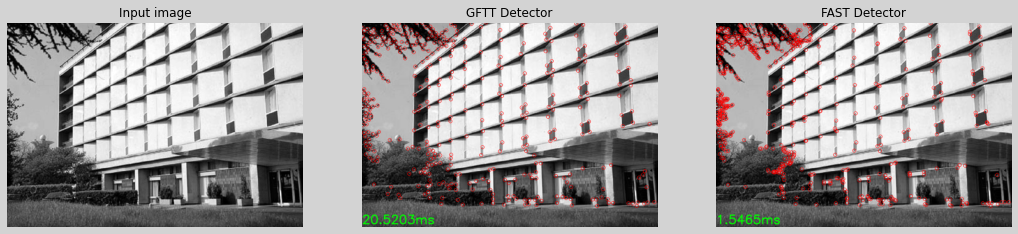

In [212]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="Input image").axis("off")
plt.imshow(source, "gray")

plt.subplot(132, title="GFTT Detector").axis("off")
plt.imshow(destination1[..., ::-1])

plt.subplot(133, title="FAST Detector").axis("off")
plt.imshow(destination2[..., ::-1])

plt.show()

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Input image", source)
cv2.imshow("GFTT Detector", destination1)
cv2.imshow("FAST Detector", destination2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #2: Feature point techniques</font>

<hr>

### Step #1: Feature point detection
<hr>

- Harris, GFTT, FAST 코너 검출의 문제점
    - 코너 검출은 영상이 회전되어도 여전히 코너로 검출된다.(이동, 회전 변환에 강인) 그러므로 코너는 회전 불변 특징점<br>
    이라고 할 수 있다. 그러나 영상의 크기가 변경될 경우 코너는 더 이상 코너로 검출되지 않을 수 있다.(크기 변환에 취약)
    - <img src="images/markdown/corner_detection_problem.png" width="600">
    - 위 영상의 왼쪽 그림에서 파란색 사각형 내부는 `에지가 급격하게 휘어지는 코너`처럼 보인다. 그러나 영상이 확대되어<br>
    영상의 가운데 그림처럼 변경되면 같은 크기의 사각형 안에서 `코너보다는 에지에 가까운 형태`로 관측되는 것을 볼 수 있다.<br>
    이를 해결하기 위해 영상의 오른쪽 그림처럼 다양한 크기 관점에서 특징을 검출하여 크기가 다른 영상에서도 지속적으로<br> 검출될 수 있는 `크기 불변 특징`에 대해 연구가 진행되었다. 그 중 가장 대표적인 알고리즘이 `SIFT`이다.

<hr>

- 크기 불변 특징점 검출 방법
    - SIFT, KAZE, AKAZE, ORB 등 다양한 특징점 검출 방법에서 스케일 스페이스(scale-space), 이미지 피라미드<br>
    (image pyramid)를 구성하여 크기 불변 특징점을 검출한다.
    - SIFT(Scale Invariant Feature Transform)
        - 2004년 캐나다의 브리티시 컬럼비아 대학교의 로우(D. Lowe) 교수가 발표한 논문에 소개된 방법이다.
        - 영상의 크기 변화에 무관하게 특징점을 추출하기 위하여 입력 영상으로부터 스케일 스페이스를 구성한다.
            - 스케일 스페이스(scale-space)는 영상에 다양한 표준 편차를 이용한 가우시안 블러링을 적용하여<br>
            구성한 영상 집합을 의미한다.
            - <img src="images/markdown/scale-space.png" width="500">
            - 위 영상에서 맨 윗 줄에 나타난 다섯 개의 블러링된 영상이 스케일 스페이스를 구성한 결과이며,<br>
            이렇게 구성한 영상 집합을 `옥타브(Octave)`라고 부른다. 이후 입력 영상의 크기를 가로, 세로<br>
            반으로 줄여 가면서 여러 옥타브를 구성한다.
        - SIFT 알고리즘에서 크기에 불변한 특징점을 검출할 때에는 인접한 가우시안 블러링 영상끼리의 `차영상`을<br>
        사용하며, 이를 `DoG(Difference of Gaussian) 영상`이라고 한다. SIFT 알고리즘은 DoG 영상 집합에서<br>
        인접한 DoG 영상을 고려한 지역 극값 위치를 특징점으로 사용하며, 이후 `에지 성분이 강하거나 명암비가 낮은`<br>
        지점은 특징점에서 제외한다.
        - SIFT 알고리즘은 특징점을 검출하는 기능뿐만 아니라 특징점 주변의 픽셀 값을 이용한 기술자(descriptor)<br>
        계산 방법도 포함한다. 특징점 기술자는 `특징점 주변 영상의 특성을 여러 개의 실수 값으로 표현한 것`을 의미하며,<br>
        `특징 벡터(feature vector)`라고도 한다. 서로 같은 특징점에서 추출된 기술자는 실수 값 구성이 서로 일치해야<br>
        한다.
        - SIFT는 기본적으로 특징점 부근의 부분 영상으로부터 그래디언트 방향 히스토그램을 추출하여 기술자로 사용한다.<br>
        `특징점 근방으로부터 특징점의 주된 방향 성분을 계산`하고, 이 방향만큼 회전한 부분 영상으로부터 128개의 빈으로<br>
        구성된 그래디언트 방향 히스토그램을 계산한다. 각각의 빈 값은 float 자료형을 사용하며, 하나의 SIFT 특징점은<br>
        512 bytes 크기의 기술자로 표현된다.
            - Canny 에지 검출 알고리즘에서 처럼 방향 그래디언트는 총 `4방향`으로 구성되어 있다.
        - SIFT 알고리즘은 영상의 크기, 회전 등의 변환뿐만 아니라 `촬영 시점 변화`에도 충분히 강인하게 동작하며,<br>
        `잡음의 영향과 조명 변화`가 있어도 특징점을 반복적으로 잘 찾아낸다.
        - SIFT 알고리즘은 다양한 컴퓨터 비전 분야에서 적용되었고, 특히 객체 인식, 파노라마 영상 이어붙이기,<br>
        3차원 장면 인식 등의 분야에서 효과적으로 사용되었다.
    - SURF(Speed-Up Robust Features)
        - SIFT 알고리즘이 발표된 이후, 만은 사람이 SIFT의 속도와 성능을 개선한 알고리즘을 발표했다. 2008년에<br>
        발표된 SURF 알고리즘은 SIFT에서 사용한 `DoG 영상을 단순한 이진 패턴으로 근사화`하여 속도를 향상시켰다.
    - KAZE
        - 2012년에 발표된 KAZE 알고리즘은 가우시안 함수 대신 `비등방성 확산 필터(nonlinear diffusion filter)`<br>
        를 이용하여 비선형 스케일 스페이스를 구축하여 특징점을 검출한다.
        - KAZE 알고리즘은 `객체의 윤곽을 잘 보전함`으로써 `블러링`, 크기 및 회전 변환, 잡음 등의 영향으로 변형된<br>
        영상에서 같은 특징점을 반복적으로 찾아내는 성능이 뛰어나다.
    - ORB(Oriented FAST and Rotated BRIEF)
        - SIFT, SURF, KAZE 방법은 스케일 스페이스를 구성하는 등의 복잡한 연산을 수행해야하기 때문에 실시간<br>
        응용에서 사용하기 어렵다는 단점이 있다. 또한 이들 특징점 알고리즘에 의해 민들어지는 기술자는 128개 또는<br>
        62개의 실수 값으로 구성되어 있어서 메모리 사용량이 많고 특징점 사이의 거리 계산도 오래 걸릴 수 있다는<br>
        단점이 있다. 그래서 2010년 전후로는 특징점 검출이 매우 빠르고 이진수로 구성된 기술자를 사용하는 알고리즘이<br>
        발표되기 시작했다. 그중 2011년 발표된 ORB 알고리즘은 당시 OpenCV를 관리하던 연구소에서 개발한 방법<br>
        으로서, SIFT와 SURF를 대체하기에 좋은 알고리즘이다.
        - ORB 알고리즘은 기본적으로 `FAST 코너 검출 방법`을 이용하여 특징점을 추출한다. 그리고 각 특징점에서 주된<br>
        방향 성분을 계산하고, `방향을 고려한 BRIEF 알고리즘`으로 이진 기술자를 계산한다.
        - ORB 알고리즘은 FAST 기반의 방법으로 특징점을 구한 후, 각 특징점에서 픽셀 밝기 값 분포를 고려한 코너<br>
        방향 성분을 계산한다. 그리고 이 방향 성분을 이용하여 BRIEF 계산에 필요한 점들의 위치를 보정함으로써<br>
        회전에 불변한 BRIEF 기술자를 계산한다.
        - ORB 알고리즘에서는 기본적으로 `256개의 크기 비교 픽셀 쌍`을 사용하여 이진 기술자를 구성하며, 결과적으로<br>
        하나의 특징점은 256 bit 로 표현할 수 있다. SIFT와 SURF 기술자가 각각 512 bytes, 256 bytes 를<br>
        사용하는 것에 비해 ORB는 32 bytes 의 크기로 특징점을 기술할 수 있어서 효율적이다.
            - 이진 기술자로 표현된 특징점 사이의 거리 계산은 주로 `해밍 거리(Hamming distance)` 방법을<br>
            사용한다. 해밍 거리는 이진수로 표현된 두 기술자에서 서로 값이 다른 비트의 개수를 세는 방식으로<br>
            계산한다. 해밍 거리 계산은 두 기술자의 비트 단위 배타적 논리합(XOR) 연산 후, 비트 값이 1인 개수를<br>
            세는 방식으로 빠르게 계산할 수 있다. ORB 외에도 BRISK, `AKAZE`, FREAK 등의 이진 기술자를 사용하는<br>
            특징점 알고리즘이 있다.
            - `BRIEF`(Binary Robust Independent Elementary Features)는 순수하게 특징점 기술자만을<br>
            생성하는 알고리즘이다. BRIEF는 특징점 주변의 픽셀 쌍을 미리 정하고, 해당 픽셀 값 크기를 비교하여<br>
            `0 또는 1로 특징을 기술`한다. 두 점 x와 y에서의 픽셀 값 크기 비교 테스트 τ는 다음과 같이 정의한다.

$$\tau(x,y)=\begin{cases}1&I(x)<I(y)\text{일 때}\\0&\text{그 외}\end{cases}$$

- `참고사항:`
    - `특징점(feature point) ≒ 키포인트(keypoint) ≒ 관심점(interest point)`
    - `기술자(descriptor) ≒ 특징 벡터(feature vector)`

<hr>

### Step #1-1: OpenCV function
<hr>

- OpenCV 특징점 검출 클래스: Feature2D 클래스와 파생 클래스
    - <img src="images/markdown/Feature2D_class.png" width="600">
    - OpenCV에서 특징점 관련 클래스는 모두 Feature2D 클래스를 상속받아 만들어진다.
    - Feature2D 클래스는 detect(), compute(), detectAndCompute()라는 이름의 가상 멤버 함수를 가지고 있으며,<br>
    Feature2D 클래스를 상속받은 각각의 특징점 알고리즘 구현 클래스는 이들 멤버 함수 기능을 실제로 구현하도록 설계되어<br>
    있다 detect() 멤버 함수는 영상에서 키포인트를 검출하고, compute() 함수는 검출된 키포인트를 표현하는 기술자를<br>
    생성한다. detectAndCompute() 멤버 함수는 키포인트 검출과 기술자 생성을 동시에 수행한다.

<hr>

> `특징점 검출 알고리즘 객체 생성`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}SIFT\_create}(, ...)\rightarrow retval}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}KAZE\_create}(, ...)\rightarrow retval}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}AKAZE\_create}(, ...)\rightarrow retval}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}ORB\_create}(, ...)\rightarrow retval}$$
- retval: 각 특징점 검출 알고리즘 객체
- `참고사항:`
    - 각각의 알고리즘은 고유한 파라미터를 지정할 수 있다.
    - 대부분의 파라미터는 기본값을 가지고 있으므로 함수 파라미터 없이 호출이 가능하다.

<hr>

> `특징점 검출 함수`

$$\mathsf{{\color{RoyalBlue}cv2.Feature2D.}{\color{Tan}detect}(image, mask)\rightarrow keypoints}$$
- image: 입력 영상
- mask: 마스크 영상
- keypoints: 검출된 특징점 정보. `cv2.KeyPoint` 객체의 리스트

<hr>

> `검출된 특징점 그리기 함수`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}drawKeypoints}(image, keypoints, outImage, color, flags)\rightarrow outImage}$$
- image: 입력 영상
- keypoints: 검출된 특징점 정보. `cv2.KeyPoint` 객체의 리스트
- outImage: 출력 영상
- color: 특징점 표현 색상
- flags: 특징점 표현 방법
- `참고사항:`
    - color: (-1, -1, -1, -1)으로 지정한 경우에는 임의의 색상으로 표현된다.
        - `기본값은 (-1, -1, -1, -1)`
    - flags: cv2.DRAW_MATCHES_FLAGS_로 시작하는 DrawMatchesFlags 열거형 상수
        - cv2.DRAW_MATCHES_FLAGS_DEFAULT: 특징점 위치만을 표현하는 작은 크기의 원
        - cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: `특징점의 크기와 방향을 반영한 원`
    - 코너 검출 방법 중 `FAST 알고리즘`이 반환하는 `cv2.KeyPoint` 객체의 리스트를 지정하여 그릴수도 있다.

In [ ]:
import cv2
help(cv2.Feature2D)

In [ ]:
import cv2
help(cv2.SIFT_create)

In [ ]:
import cv2
help(cv2.KAZE_create)

In [ ]:
import cv2
help(cv2.AKAZE_create)

In [ ]:
import cv2
help(cv2.ORB_create)

In [ ]:
import cv2
help(cv2.Feature2D.detect)

In [ ]:
import cv2
help(cv2.drawKeypoints)

<hr>

### Step #1-2: Implementation example
<hr>

In [423]:
# 특징점 검출 예제
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


reset point

In [424]:
# 특징점 검출 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
# instance = cv2.SIFT_create()
# instance = cv2.KAZE_create()
instance = cv2.AKAZE_create()
# instance = cv2.ORB_create(1000)  # nfeatures=500(default)

In [425]:
# 특징점 검출
keypoints1 = instance.detect(source1)
keypoints2 = instance.detect(source2)

In [426]:
# 검출된 특징점 개수
print("keypoints of 1st source: ", len(keypoints1))
print("keypoints of 2nd source: ", len(keypoints2))

keypoints of 1st source:  2418
keypoints of 2nd source:  2884


In [427]:
# 검출된 특징점 결과 영상 생성
destination1 = cv2.drawKeypoints(
    source1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
destination2 = cv2.drawKeypoints(
    source2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

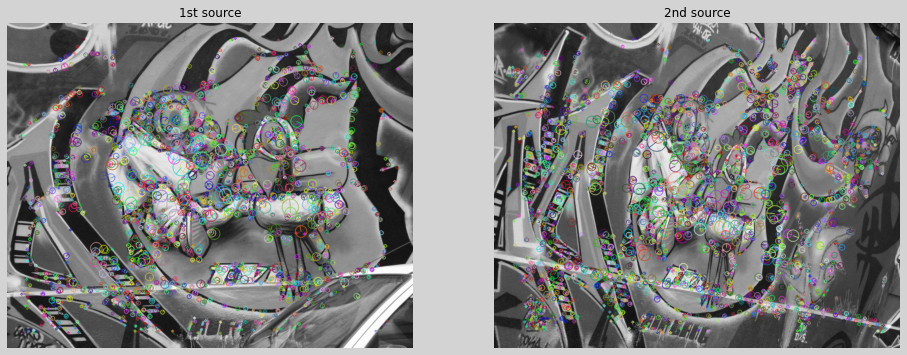

In [428]:
# 결과 영상 출력(pyplot)
plt.figure(figsize=(16, 6), facecolor="lightgray")

plt.subplot(121, title="1st source").axis("off")
plt.imshow(destination1, "gray")

plt.subplot(122, title="2nd source").axis("off")
plt.imshow(destination2, "gray")

plt.show()

In [ ]:
# 결과 영상 출력(OpenCV 가상 윈도우)
cv2.imshow("1st source", destination1)
cv2.imshow("2nd source", destination2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Step #2: Feature point description
<hr>

- 기술자(Descriptor, feature vector)
    - 특징점 근방의 부분 영상을 표현하는 실수 또는 이진 벡터이다.
    - OpenCV에서는 2차원 행렬(numpy.ndarray)로 표현한다.
        - 행 개수: 특징점 개수
        - 열 개수: 특징점 기술자 알고리즘에 의해 정의된다.
        - 실수 기술자: numpy.float32
        - 이진 기술자: numpy.uint8
        - 실수 기술자 예: <img src="images/markdown/KAZE_descriptor_matrix.png" width="600">

<hr>

- 실수 기술자(Real number descriptor)
    - 주로 특징점 부근 부분 영상의 방향 히스토그램을 사용한다.
    - <img src="images/markdown/real_number_descriptor.png" width="600">
    - 보통 `numpy.float32` 자료형을 사용하여 실수 정보를 저장하는 방식이다.
    - 실수 기술자를 사용하는 알고리즘으로는 `SIFT, SURF, KAZE` 등이 있다.
    - 실수 기술자는 보통 `L2 norm(L2 정규화, 유클리드 거리)`을 사용하여 유사도를 판단한다.

<hr>

- 이진 기술자(Binary descriptor)
    - 이진 테스트(Binary test)를 이용하여 부분 영상의 특징을 기술한다.
    - <img src="images/markdown/binary_descriptor.png" width="600">
    - 보통 `numpy.uint8` 자료형을 사용하여 비트 단위로 영상 특징 정보를 저장하는 방식이다.
    - 이진 기술자를 사용하는 알고리즘으로는 `AKAZE, ORB, BRIEF` 등이 있다.
    - 이진 기술자는 `해밍 거리(Hamming distance)`를 사용하여 유사도를 판단한다.

<hr>

- 특징점 검출 알고리즘 성능 비교
    - 연산 시간 비교
    - <img src="images/markdown/Feature2D_operation_time.png" width="600">
    - 반복 검출율
    - <img src="images/markdown/Feature2D_iterative_detect_rate.png" width="600">
    - <img src="images/markdown/Feature2D_total.png" width="600">

<hr>

### Step #2-1: OpenCV function
<hr>

> `특징점 기술자 계산 함수`

$$\mathsf{{\color{RoyalBlue}cv2.Feature2D.}{\color{Tan}compute}(image, keypoints, descriptors)\rightarrow keypoints, descriptors}$$
- image: 입력 영상
- keypoints: 미리 검출해 둔 특징점 정보. 입력으로 전달한다.
- descriptors: 계산된 특징점 기술자 행렬

<hr>

> `특징점 검출 및 기술자 계산 함수`

$$\mathsf{{\color{RoyalBlue}cv2.Feature2D.}{\color{Tan}detectAndCompute}(image, mask, descriptors)\rightarrow keypoints, descriptors}$$
- image: 입력 영상
- mask: 마스크 영상
- keypoints: 검출된 특징점 정보
- descriptors: 계산된 특징점 기술자 행렬
- `참고사항:`
    - 특징점 매칭을 할 경우에는 detectAndCompute() 함수를 사용하는 것이 보편적이다.

In [ ]:
import cv2
help(cv2.Feature2D.compute)

In [ ]:
import cv2
help(cv2.Feature2D.detectAndCompute)

<hr>

### Step #2-2: Implementation example
<hr>

In [219]:
# 특징점 기술자 예제
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


In [220]:
# 특징점 검출 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
# instance = cv2.SIFT_create()
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
instance = cv2.ORB_create()  # nfeatures=500(default)

In [221]:
# 특징점 검출 및 기술자 생성
keypoints1 = instance.detect(source1)
_, descriptor1 = instance.compute(source1, keypoints1)

keypoints2, descriptor2 = instance.detectAndCompute(source2, None)

In [222]:
# 기술자 정보(실수 or 이진)
print("descriptor1.shape: ", descriptor1.shape)
print("descriptor1.dtype: ", descriptor1.dtype)
print("descriptor2.shape: ", descriptor2.shape)
print("descriptor2.dtype: ", descriptor2.dtype)

descriptor1.shape:  (500, 32)
descriptor1.dtype:  uint8
descriptor2.shape:  (500, 32)
descriptor2.dtype:  uint8


<hr>

### Step #3: Feature point matching
<hr>

- 특징점 매칭(Feature point matching)
    - 두 영상에서 추출한 특징점 기술자를 비교하여 서로 비슷한(유사한) 기술자, 즉 특징점을 찾는 작업을 의미한다.<br>
    특히 `크기 불변 특징점`으로부터 구한 기술자를 매칭하면 `크기와 회전에 강인한 영상 매칭`을 수행할 수 있다.
    - <img src="images/markdown/feature_point_matching.png" width="600">

<hr>

- OpenCV 특징점 매칭 클래스
    - <img src="images/markdown/opencv_feature_point_matching_class.png" width="600">
    - OpenCV에서 특징점 매칭 정보를 저장할 때 사용하는 `DMatch 클래스`는 한 장의 영상에서 추출한 특징점과<br>
    다른 한 장의 영상, `또는 여러 영상`에서 추출한 특징점 사이의 매칭 정보를 표현할 수 있다.
        - `queryIdx` 멤버 변수는 질의 기술자 번호를 나타낸다.
        - `trainIdx` 멤버 변수는 훈련 기술자 번호를 나타낸다.
        - `imgIdx` 멤버 변수는 훈련 영상 번호를 나타낸다. 여러 장의 영상을 훈련 영상으로 설정한 경우에 사용된다.
        - `distance` 멤버 변수는 두 기술자 사이의 거리를 나타낸다.
            - 두 키포인트 기술자가 얼마나 차이가 나는지를 나타내는 매칭 척도의 역할이다. 두 특징점이 서로 유사하면<br>
            distance 값이 0에 가깝고, 서로 다른 특징점이면 distance 값이 크게 나타난다. distance 계산 방식은<br>
            다타원 벡터의 `유클리드 거리`로 주로 계산하며, 다만 이진 기술자끼리 비교하는 경우에는 `해밍 거리`를 사용한다.
                - 실수 특징 벡터: L2 norm(Euclidean distance) 사용
                - 이진 특징 벡터: 해밍 거리(Hamming distance) 사용
    - OpenCV에서 제공하는 특징점 매칭 클래스는 `DescriptorMatcher` 클래스를 상속받아 만들어진다.<br>
    DescriptorMatcher 클래스는 `match(), knnMatch(), radiusMatch()` 등의 가상 멤버 함수를 가지고 있는<br>
    추상 클래스이며, DescriptorMatcher 클래스를 상속받은 BFMatcher 클래스와 FlannBasedMatcher 클래스는<br>
    이들 멤버 함수 기능을 실제로 구현하도록 설계되어 있다.
        - `match()` 함수: 가장 비슷한 기술자 쌍을 하나 찾는다.
        - `knnMatch()` 함수: 비슷한 기술자 쌍 k개를 찾는다.
        - `radiusMatch()` 함수: 지정한 `거리 반경` 안에 있는 기술자 쌍을 `모두 찾는다.`
    - DescriptorMatcher 클래스를 상속받은 `BFMatcher` 클래스
        - `전수 조사(BF: Brute-force)` 매칭을 수행한다.
        - BFMatcher 클래스는 질의 기술자 집합에 있는 모든 기술자와 훈련 기술자 집합에 있는 모든 기술자 사이의<br>
        거리를 계산하고, 이 중 가장 거리가 작은 기술자를 찾아 매칭하는 방식이다.
        - BFMatcher 클래스의 매칭 결정 방법은 매우 직관적이지만 특징점 개수가 늘어날수록 거리 계산 횟수가 급격하게<br>
        늘어날 수 있다는 단점이 있다.
            - e.g., 첫 번째 영상에 1000개의 특징점이 있고, 두 번째 영상에 2000개의 특징점이 있다면 BFMatcher<br>
            방법은 총 2,000,000번의 비교 연산을 수행해야 한다. 그러므로 특징점 개수가 늘어날수록 BFMatcher<br>
            클래스 대신 FlannBasedMatcher 클래스를 사용하는 것이 효율적이다. 다만, 보통 일반적으로 특징점 매칭<br>
            을 수행하는 경우에 의미 있는 특징점이 1000개 이상 넘어가는 경우는 드물기 때문에 주로 BFMatcher 방법을<br>
            사용한다.
    - DescriptorMatcher 클래스를 상속받은 `FlannBasedMatcher` 클래스
        - Flann(Fast Library approximate nearest neighbors)은<br>
        근사화된 최근방 이웃(ANN, Approximate Nearest Neighbors) 알고리즘을 빠르게 구현한 라이브러리 이다.<br>
        그리고 FlannBasedMatcher 클래스는 Flann 라이브러리를 이용하여 빠르게 매칭을 수행하는 클래스이다.<br>
        즉, FlannBasedMatcher 클래스는 근사화된 거리 계산 방법을 사용하므로 `가장 거리가 작은 특징점을 찾지 못할`<br>
        `수 있지만`, `매우 빠르게 동작`한다. 다만 FlannBasedMatcher 클래스는 기본적으로 `L2 norm` 거리 특정<br>
        방식을 사용하므로 `해밍 거리를 사용하는 이진 기술자`에 대해서는 사용할 수 없다.
            - i.e., 이진 기술자에 대해서도 지역성 의존 해상(LSH, Locally Sensitive Hashing) 기법을<br>
            이용하여 FlannBasedMatcher 클래스를 사용할 수는 있지만 사용법이 까다로운 편이다.

<hr>

### Step #3-1: OpenCV function
<hr>

> `특징점 매칭 알고리즘 객체 생성`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}BFMatcher\_create}(, normType, crossCheck)\rightarrow retval}$$
- normType: normalization type. 특징점 기술자 거리 계산 방식 지정
- crossCheck: 양방향 매칭 사용 여부
- retval: return value. DescriptorMatcher 객체
- `참고사항:`
    - normType:
        - `cv2.NORM_L1`: 각 원소들의 절댓값의 합(이동 거리)
        - `cv2.NORM_L2`: 유클리드 거리(변위). `기본값`
        - `cv2.NORM_HAMMING`: 해밍 거리 계산(bin 1)
        - `cv2.NORM)HAMMING2`: 두 비트를 한 단위로 취급하여 해밍 거리 계산(bin 2)
    - crossCheck: 이 값이 True이면 양방향 매칭 결과가 같은 경우만 반환한다.
        - `기본값은 False`
        - 양방향 결과가 같은 경우: `i번째 질의 기술자`와 가장 유사한 `훈련 기술자가 j`이고, `j번째 훈련 기술자`와<br>
        가장 유사한 `질의 기술자가 i`인 경우에만 매칭

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}FlannBasedMatcher}()\rightarrow retval}$$
- retval: return value. FlannBasedMatcher 객체를 참조하는 Ptr 스마트 포인터 객체

<hr>

> `특징점 검출 알고리즘 객체 생성`

$$\mathsf{{\color{RoyalBlue}cv2.DescriptorMatcher.}{\color{Tan} match}(queryDescriptors, trainDescriptors, mask)\rightarrow matches}$$
- queryDescriptors: (기준 영상 특징점) 질의 기술자 행렬
- trainDescriptors: (대상 영상 특징점) 훈련 기술자 행렬
- mask: 매칭 진행 여부를 지정하는 행렬 마스크
- matches: 매칭 결과. `cv2.DMatch` 객체의 리스트

$$\mathsf{{\color{RoyalBlue}cv2.DescriptorMatcher.}{\color{Tan} knnMatch}(queryDescriptors, trainDescriptors, k, mask, compactResult)\rightarrow matches}$$
- queryDescriptors: (기준 영상 특징점) 질의 기술자 행렬
- trainDescriptors: (대상 영상 특징점) 훈련 기술자 행렬
- k: 질의 기술자에 대해 검출할 매칭 개수
- mask: 매칭 진행 여부를 지정하는 행렬 마스크
- compactResult: mask가 None이 아닐 때 사용되는 파라미터
- matches: 매칭 결과. `cv2.DMatch` 객체의 리스트의 `리스트`
- `참고사항:`
    - compactResult: True인 경우 결과 matches는 기준 영상 특징점과 같은 크기를 가진다.
        - `기본값은 False`

$$\mathsf{{\color{RoyalBlue}cv2.DescriptorMatcher.}{\color{Tan} radiusMatch}(queryDescriptors, trainDescriptors, maxDistance, mask, compactResult)\rightarrow matches}$$
- queryDescriptors: (기준 영상 특징점) 질의 기술자 행렬
- trainDescriptors: (대상 영상 특징점) 훈련 기술자 행렬
- maxDistance: 매칭 여부를 결정할 최대 distance 임계값
- mask: 매칭 진행 여부를 지정하는 행렬 마스크
- compactResult: mask가 None이 아닐 때 사용되는 파라미터
- matches: 매칭 결과. `cv2.DMatch` 객체의 리스트
- `참고사항:`
    - maxDistance: 여기서의 distance는 유사도(e.g., L2 norm)를 의미하며, 지정한 반경 내의 모든 기술자 쌍을<br>
    검출한다. 그러므로 검출되는 기술자 쌍의 개수는 미지수의 형태가 된다.
    - compactResult: True인 경우 결과 matches는 기준 영상 특징점과 같은 크기를 가진다.
        - `기본값은 False`

<hr>

> `특징점 매칭 결과 영상 생성`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}drawMatches}(img1, keypoints1, img2, keypoints2, matches1to2, outImg, matchColor, singlePointColor, matchesMask, flags)\rightarrow outImg}$$
- img1: 1st image. 기준 영상
- keypoints1: keypoints of 1st image. 기준 영상에서 추출한 특징점 정보(cv2.KeyPoint 객체 리스트)
- img2: 2nd image. 대상 영상
- keypoints2: keypoints of 2nd image. 대상 영상에서 추출한 특징점 정보(cv2.KeyPoint 객체 리스트)
- matches1to2: 매칭 정보. cv2.DMatch 객체의 리스트
- outImg: 출력 영상(destination)
- matchColor: 매칭된 특징점과 직선 색상
- singlePointColor: 매칭되지 않은 특징점 색상
- matchesMask: 매칭 정보를 선택하여 그릴 때 사용할 마스크(마스크 연산시)
- flags: 매칭 정보 그리기 방법
- `참고사항:`
    - `outImg`: 기본값이 None이 아니기 때문에 None을 따로 지정해야 한다.
    - matchColor: (B, G, R) 형태의 튜플로 전달한다. -1을 지정하면 랜덤하게 출력
        - `기본값은 -1`
    - singlePointColor: (B, G, R) 형태의 튜플로 전달한다. -1을 지정하면 랜덤하게 출력
        - `기본값은 -1`
    - flags: cv2.DRAW_MATCHES_FLAGS_로 시작하는 DrawMatchesFlags 열거형 상수
        - cv2.DRAW_MATCHES_FLAGS_DEFAULT: 특징점 위치만을 표현하는 작은 크기의 원. `기본값`
        - cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: 특징점의 크기와 방향을 반영한 원
        - cv2.DRAW_MATCHES_FLAGS_OVER_OUTIMG: (?)#### TODO
        - cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS: 매칭되지 않은 특징점을 제외하고,<br>
        매칭된 특징점 위치만을 표현

In [ ]:
import cv2
help(cv2.DescriptorMatcher)

In [ ]:
import cv2
help(cv2.BFMatcher_create)

In [ ]:
import cv2
help(cv2.FlannBasedMatcher_create)

In [ ]:
import cv2
help(cv2.DescriptorMatcher.match)

In [ ]:
import cv2
help(cv2.DescriptorMatcher.knnMatch)

In [ ]:
import cv2
help(cv2.DescriptorMatcher.radiusMatch)

In [ ]:
help(cv2.drawMatches)

<hr>

### Step #3-2: Implementation example
<hr>

In [223]:
# 특징점 매칭 예제
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


In [224]:
# 특징점 검출 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
instance = cv2.SIFT_create(1000)
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
# instance = cv2.ORB_create()  # nfeatures=500(default)

In [225]:
# 특징점 검출 및 기술자 생성
keypoints1, descriptors1 = instance.detectAndCompute(source1, None)
keypoints2, descriptors2 = instance.detectAndCompute(source2, None)

In [226]:
# 검출된 특징점 매칭
matcher = cv2.BFMatcher_create()
# matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

matches = matcher.match(descriptors1, descriptors2)

In [227]:
# 검출된 특징점 개수와 매칭점 개수
print("keypoints of 1st source: ", len(keypoints1))
print("keypoints of 2nd source: ", len(keypoints2))
print("matches of 1st source to 2nd: ", len(matches))

keypoints of 1st source:  1000
keypoints of 2nd source:  1000
matches of 1st source to 2nd:  1000


In [228]:
# 매칭된 특징점 결과 영상 생성
destination = cv2.drawMatches(source1, keypoints1, source2, keypoints2, matches, None)

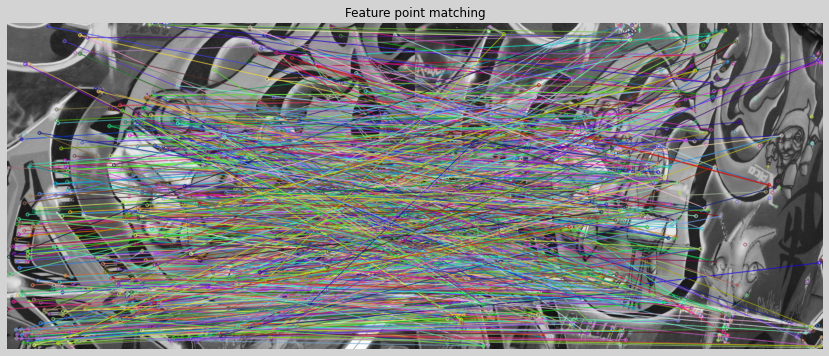

In [229]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")
plt.title("Feature point matching")
plt.imshow(destination, "gray")
plt.axis("off")
plt.show()

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Feature point matching", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Step #4: Good matching selection
<hr>

- 좋은 매칭 선별 방법 #1
    - 가장 좋은 매칭 결과에서 distance 값이 작은 것 N개를 사용한다.
        - `cv2.DMatch.distance` 값을 기준으로 오름 차순 정렬(값이 작은것 부터)한다.
        - 정렬된 값에서 상위 N개를 선택한다.

<hr>

- 좋은 매칭 선별 방법 #2
    - 가장 좋은 매칭 결과의 distance 값과 두 번째로 좋은 좋은 매칭 결과의 distance 값의 비율을 계산한다.
        - 이 비율이 `임계값`(e.g., 0.7)보다 작으면 선택한다.
        - 비율 계산은 다음과 같이 한다.

$$\mathsf{if\ k=2,\ good\ matching=\frac{closest\_distance}{next\_closest\_distance} < Threshold}$$
$$\mathsf{closest\_distance=matches[i].distance[0]}$$
$$\mathsf{next\_closest\_distance=matches[i].distance[1]}$$

In [30]:
# 좋은 매칭 선별 예제
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


In [31]:
# 특징점 검출 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
instance = cv2.SIFT_create()
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
# instance = cv2.ORB_create()  # nfeatures=500(default)

In [32]:
# 특징점 검출 및 기술자 생성
keypoints1, descriptors1 = instance.detectAndCompute(source1, None)
keypoints2, descriptors2 = instance.detectAndCompute(source2, None)

In [33]:
# 좋은 매칭 결과 선별 #1: 검출된 특징점 매칭 결과 중 가장 좋은 결과의 distance 값이 작은 것 N개를 선택
matcher = cv2.BFMatcher_create()
# matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

matches = matcher.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:378]

print("keypoints of 1st source:", len(keypoints1))
print("keypoints of 2nd source:", len(keypoints2))
print("# of matches:", len(matches))
print("# of good matches:", len(good_matches))  # 선별된 좋은 매칭점 개수

# 특징점 매칭 결과 영상 생성
destination = cv2.drawMatches(
    source1, keypoints1, source2, keypoints2, good_matches, None, (0, 0, 255), (0, 255, 0))

keypoints of 1st source: 2665
keypoints of 2nd source: 3498
# of matches: 2665
# of good matches: 378


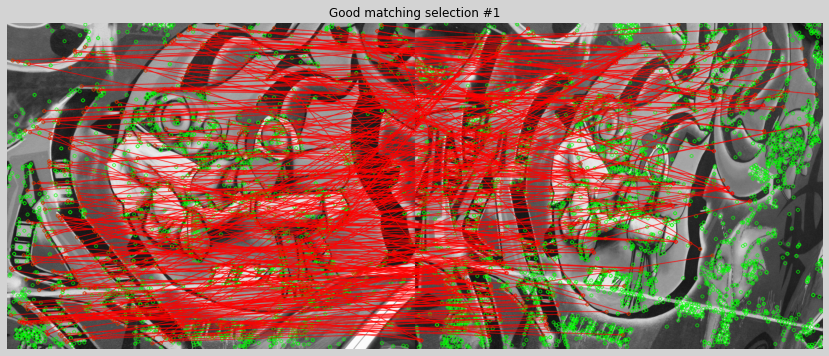

In [34]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")
plt.title("Good matching selection #1")
plt.imshow(destination[..., ::-1])
plt.axis("off")
plt.show()

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Good matching selection #1", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [36]:
# 좋은 매칭 결과 선별 #2: 검출된 특징점 매칭 결과 중 가장 좋은 결과의 distance 값과 두 번째로 좋은 결과의 distance 값의 비율로 선정
matcher = cv2.BFMatcher_create()
# matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

matches = matcher.knnMatch(descriptors1, descriptors2, 2)  # matches = (N, K) - N: 매칭점 개수, K: 매칭 결과 수

THRESHOLD = 0.7
good_matches = []

for match in matches:
    if match[0].distance / match[1].distance < THRESHOLD:
        good_matches.append(match[0])

print("keypoints of 1st source:", len(keypoints1))
print("keypoints of 2nd source:", len(keypoints2))
print("# of matches:", len(matches))
print("# of good matches:", len(good_matches))  # 선별된 좋은 매칭점 개수

# 특징점 매칭 결과 영상 생성
destination = cv2.drawMatches(
    source1, keypoints1, source2, keypoints2, good_matches, None,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

keypoints of 1st source: 2665
keypoints of 2nd source: 3498
# of matches: 2665
# of good matches: 378


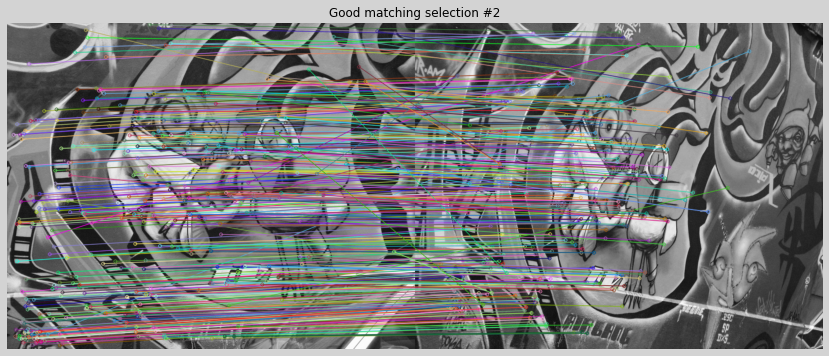

In [37]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")
plt.title("Good matching selection #2")
plt.imshow(destination[..., ::-1])
plt.axis("off")
plt.show()

In [301]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Good matching selection #2", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #3: Homography</font>

<hr>

### Step #1: Concept
<hr>

- 호모그래피(Homography)
    - 3차원 공간상의 평면을 서로 다른 시점에서 바라봤을 때 획득되는 영상 사이의 관계를 나타내는 용어이다.
    - 호모그래피는 `수학적으로 하나의 평면을 다른 평면으로 투시 변환(perspective transform)하는 것과 같은 관계`에<br>
    있다. 아래 영상의 왼쪽은 3차원 공간에서 평면과 획득된 영상과의 호모그래피 관계를 보여준다.
    - 아래 영상의 왼쪽에서 바닥에 놓인 평면 P를 `v(1) 시점에서 바라본 영상 I(1)`과 `v(2) 시점에서 바라본 영상 I(2)`<br>
    사이의 관계를 `호모그래피 H(12)`로 표현하였다. 또한 `영상 I(1)과 평면 P` 사이의 관계, 또는 `영상 I(2)와 평면 P`<br>
    사이의 관계도 각각 `호모그래피 H(1)과 H(2)` 형태로 표현할 수 있다.
    - <img src="images/markdown/homography.png" width="600">
    - 실제적인 연산 관점에서 호모그래피는 투시 변환과 같기 때문에 호모그래피는 `3x3 실수 행렬`로 표현할 수 있다.<br>
    또한 투시 변환을 구할 때와 마찬가지로 `네 개의 대응되는 점의 좌표 이동 정보`가 있으면 호모그래피 행렬을 구할 수<br>
    있다. 그러나 특징점 매칭 정보로부터 호모그래피를 구하는 경우에는 서로 대응되는 점 개수가 네 개보다 훨씬 많기<br>
    때문에 이러한 경우에는 `투시 변환 시 에러가 최소가 되는 형태의 호모그래피 행렬`을 구해야 한다.

<hr>

### Step #2: OpenCV function
<hr>

> `호모그래피 계산 함수`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}findHomography}(srcPoints, dstPoints, method, ransacReprojThreshold, mask, maxIters, confidence)\rightarrow retval, mask}$$
- srcPoints: 입력 점 좌표
- dstPoints: 결과 점 좌표
- method: 호모그래피 행렬 계산 방법
- ransacReprojThreshold: RANSAC 재투영 에러 허용치
- maxIters: RANSAC 최대 반복 횟수
- confidence: 신뢰도 레벨
- retval: 호모그래피 행렬
- mask: 출력 마스크 행렬
- `참고사항:`
    - srcPoints:
        - type=`numpy.ndarray`
        - shape=`(N, 1, 2)`
        - dtype=`numpy.float32`
    - dstPoints:
        - type=`numpy.ndarray`
        - shape=`(N, 1, 2)`
        - dtype=`numpy.float32`
    - method: 이상치가 있을 경우 RANSAC, RHO 방법을 권장한다.
        - 0: 최소자승법, 즉 모든 점을 사용하는 일반적인 방법이다. `기본값`
        - LMEDS: 최소 메디안 제곱(least-median of squares) 방법
        - `RANSAC`: RANdom SAmple Consensus, 이상치(Outlier)가 많은 원본 데이터로부터 모델 파라미터를<br>
        예측 하는 방법이다.
        - RHO: PROSAC 방법
    - ransacReprojThreshold: 여기에 지정된 값 이내로 재투영되는 경우에만 정상치로 간주한다. RANSAC과 RHO<br>
    방법에서만 사용된다.
        - `기본값은 3`
    - maxIters:
        - `기본값은 2000`
    - confidence: 0에서 1사이의 실수를 지정한다.
        - `기본값은 None`
    - retval:
        - type=`numpy.ndarray`
        - shape=`(3, 3)`
        - dtype=`numpy.float32`
    - mask: `RANSAC, RHO 방법 사용 시` Inlier(정상치)로 사용된 점들을 `1로 표시`한(Other 0) 1차원 행렬이다.
        - type=`numpy.ndarray`
        - shape=`(N, 1)`
        - dtype=`uint8`

<hr>

- 호모그래피 계산 함수 이용 시 파라마터 설정 권장사항
    - method 파라미터에 `기본값인 0`을 지정하면 위에서 말했듯이 `입력 점과 출력 점을 모두 사용`하는 최소자승법으로<br>
    호모그래피 행렬을 계산한다. 그러나 일반적으로 특징점 매칭 결과로부터 호모그래피를 계산할 때 최소자승법을 사용하면<br>
    호모그래피가 제대로 계산되지 않는다. 잘못 매칭된 점들처럼 오차가 큰 입력 정보를 `이상치(Outlier)`라고 부르며,<br>
    `이상치가 많이 존재하는 경우`에는 method 파라미터를 `LMEDS, RANSAC, RHO` 방법으로 설정하는 것이 좋다.
        - `LMEDS method`는 보통 이상치가 `50% 이하`인 경우에 올바르게 작동한다.
        - `RANSAC or RHO method`는 이상치가 `50% 이상` 존재하더라도 호모그래피 행렬을 잘 찾아 주는 편이다.<br>
        RANSAC or RHO method를 사용할 경우에는 srcPoints와 dstPoints에 저장된 점이 이상치가 아니라고<br>
        판단하기 위한 임계값을 설정해야 하며, 이 값은 `ransacReprojThreshold` 파라미터로 지정한다.<br>
        만약 `H x srcPoints(i)와 dstPoints(i) 사이의 거리`가 ransacReprojThreshold보다 작으면<br>
        정상치(Inlier)로 간주한다.
            - `RANSAC(RANdom SAmple Consensus)` 알고리즘: 이상치가 포함된 입력 데이터로부터 수학적 모델<br>
            파라미터를 효과적으로 결정하는 알고리즘이다. RANSAC 알고리즘으로 호모그래피를 계산하는 경우, 다수의<br>
            특징점 매칭 정보로부터 `네 개의 대응점을 임의로 추출`한다. 이 대응점 정보를 이용하여 `3x3 호모그래피`<br>
            `행렬을 계산`하고, 나머지 특징점 매칭 쌍 중에서 현재 `구한 호모그래피 행렬에 부합되는 매칭 쌍 개수`를 센다.<br>
            그리고 다시 임의로 네 개의 대응점을 추출하고, 호모그래피 행렬 계산과 해당 호모그래피에 부합되는 매칭 쌍<br>
            개수를 세는 `작업을 반복`한다. 이 작업을 여러 번 반복한 후, `가장 많은 매칭 쌍의 지지`를 받은 호모그래피<br>
            행렬을 최종 호모그래피 행렬로 결정하는 방식이 RANSAC 알고리즘이다.

<hr>

### Step #3: Implementation example
<hr>

In [43]:
# 호모그래피 계산을 이용한 영상 매칭 예제
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np

source1 = cv2.imread("images/box.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/box_in_scene.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


In [44]:
# 특징점 검출 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
# instance = cv2.SIFT_create()
# instance = cv2.KAZE_create()
instance = cv2.AKAZE_create()
# instance = cv2.ORB_create()  # nfeatures=500(default)

In [45]:
# 특징점 검출 및 기술자 생성
keypoints1, descriptors1 = instance.detectAndCompute(source1, None)
keypoints2, descriptors2 = instance.detectAndCompute(source2, None)

In [46]:
# 좋은 매칭 결과 선별
# matcher = cv2.BFMatcher_create()
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

matches = matcher.knnMatch(descriptors1, descriptors2, 2)

THRESHOLD = 0.7
good_matches = []

for match in matches:
    if match[0].distance / match[1].distance < THRESHOLD:
        good_matches.append(match[0])

print("keypoints of 1st source:", len(keypoints1))
print("keypoints of 2nd source:", len(keypoints2))
print("# of matches:", len(matches))
print("# of good matches:", len(good_matches))  # 선별된 좋은 매칭점 개수

keypoints of 1st source: 383
keypoints of 2nd source: 795
# of matches: 383
# of good matches: 20


In [49]:
# 호모그래피 계산
points1 = np.array(
    [keypoints1[match.queryIdx].pt for match in good_matches]
    ).reshape(-1, 1, 2).astype(np.float32)
points2 = np.array(
    [keypoints2[match.trainIdx].pt for match in good_matches]
    ).reshape(-1, 1, 2).astype(np.float32)

homography, _ = cv2.findHomography(points1, points2, cv2.RANSAC)

# 호모그래피를 이용하여 기준 영상 영역 표시
destination = cv2.drawMatches(
    source1, keypoints1, source2, keypoints2, good_matches, None,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

HEIGHT, WIDTH = source1.shape[:2]
corners1 = np.array(
    [[0, 0], [0, HEIGHT-1], [WIDTH-1, HEIGHT-1], [WIDTH-1, 0]]
    ).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, homography)
corners2 += np.float32([WIDTH, 0])

destination = cv2.polylines(destination, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

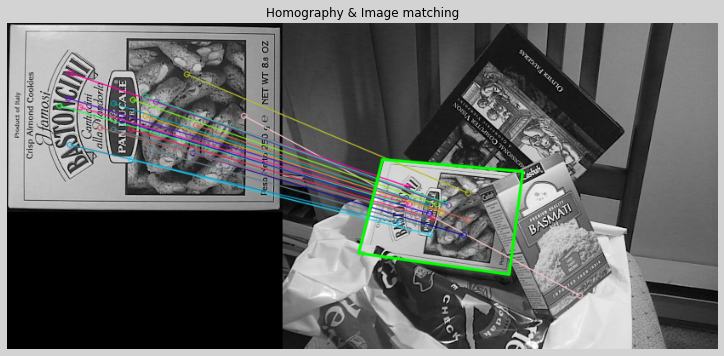

In [50]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")
plt.title("Homography & Image matching")
plt.imshow(destination[..., ::-1])
plt.axis("off")
plt.show()

In [340]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Homography", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #4: Image stitching</font>

<hr>

### Step #1: Concept
<hr>

- 영상 이어 붙이기(Image Stitching)
    - 여러 장의 영상을 서로 이어 붙여서 하나의 큰 영상을 만드는 기법이다.
    - 영상 이어 붙이기로 만들어진 영상을 파노라마 영상(panorama image)이라고 부르며, 많은 디지털 카메라 또는<br>
    스마트폰 카메라 앱에서도 파노라마 영상을 만들어 주는 기능을 제공하고 있다.
    - 영상 이어 붙이기에서 입력으로 사용할 영상은 서로 일정 비율 이상으로 겹치는 영역이 존재해야 하며, 서로 같은<br>
    위치를 분간할 수 있도록 유효한 특징점이 많이 있어야 한다.
    - <img src="images/markdown/image_stitching_exam.png" width="600">

<hr>

- 영상 이어 붙이기 수행 방법
    - 입력 영상에서 `특징점을 검출`하고, `서로 매칭을 수행`하여 `호모그래피`를 구해야 한다. 그리고 구해진 호모그래피<br>
    행렬을 기반으로 `입력 영상을 변형`하여 서로 이어 붙이는 작업을 수행한다. 이때 영상을 이어 붙인 결과가 자연스럽게<br>
    보이도록 이어 붙인 영상의 밝기를 적절하게 보정하는 `블렌딩(blending)` 처리도 해야 한다. OpenCV는 이러한<br>
    일련의 영상 이어 붙이기 작업을 수행하는 Stitcher 클래스를 제공한다. Stitcher 클래스를 사용하면 간단한<br>
    함수 호출을 통해 여러 영상을 서로 이어 붙일 수 있다.
    - <img src="images/markdown/image_stitching_method1.png" width="600">
    - <img src="images/markdown/image_stitching_method2.png" width="600">
    - <img src="images/markdown/image_stitching_method3.png" width="600">
    - <img src="images/markdown/image_stitching_sheet.png" width="600">

In [ ]:
$$\mathsf{{\color{RoyalBlue} }{\color{Tan} }()\rightarrow }$$
- <img src="images/markdown/.png" width="600">

<hr>

### Step #2: OpenCV function
<hr>

<hr>

### Step #3: Implementation example
<hr>

In [410]:
# Image stitching example
import sys

import cv2
import matplotlib.pyplot as plt

image_name = ["img1.jpg", "img2.jpg", "img3.jpg"]
images = []
for name in image_name:
    image = cv2.imread(f"images/{name}")
    
    if image is None:
        print("Image load failed!")
        sys.exit()
    else:
        print("Image load succeed!")
    
    images.append(image)

Image load succeed!
Image load succeed!
Image load succeed!


In [411]:
# 이미지 스티칭 객체 생성
stitcher = cv2.Stitcher_create()

# 이미지 스티칭
status, destination = stitcher.stitch(images)

if status == cv2.Stitcher_OK:
    print("Stitch succeed!")
else:
    print("Stitch failed!")
    sys.exit()

Stitch succeed!


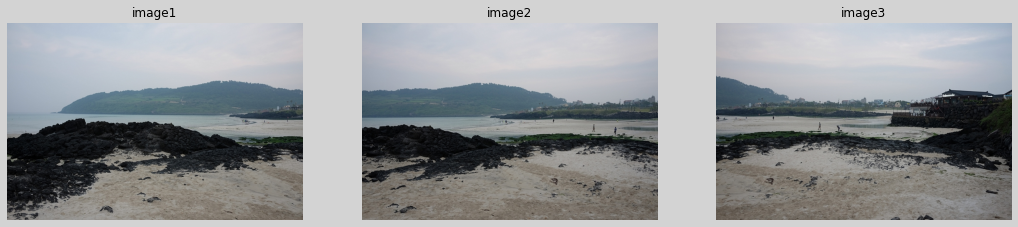

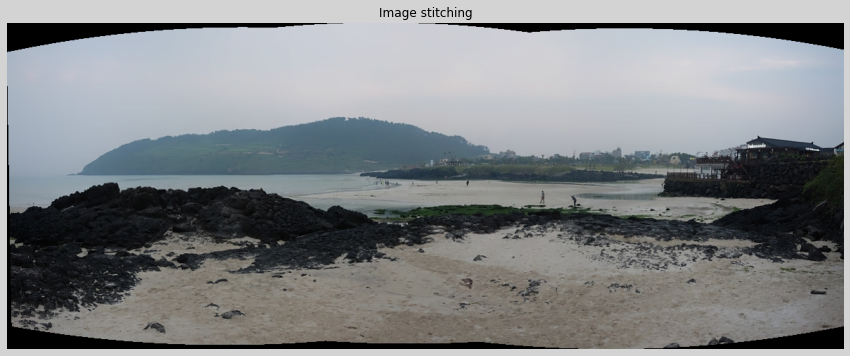

In [406]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="image1").axis("off")
plt.imshow(images[0][..., ::-1])

plt.subplot(132, title="image2").axis("off")
plt.imshow(images[1][..., ::-1])

plt.subplot(133, title="image3").axis("off")
plt.imshow(images[2][..., ::-1])

plt.show()

plt.figure(figsize=(18, 6), facecolor="lightgray")
plt.imshow(destination[..., ::-1])
plt.title("Image stitching")
plt.axis("off")

plt.show()

In [408]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Image1", images[0])
cv2.imshow("Image2", images[1])
cv2.imshow("Image3", images[2])
cv2.imshow("Image stitching", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(2)

-1

## <font color = "#CC3D3D">Training #1: </font>